In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("📊 Order Book Data Exploration Notebook")
print("=" * 50)


📊 Order Book Data Exploration Notebook


In [ ]:
# Load order book data
try:
    ob_data = pd.read_csv('../data/raw/orderbook_data.csv')
    ob_data['timestamp'] = pd.to_datetime(ob_data['timestamp'])
    
    print("📈 Order Book Data:")
    print(f"Shape: {ob_data.shape}")
    print(f"Time range: {ob_data['timestamp'].min()} to {ob_data['timestamp'].max()}")
    print("\nFirst few rows:")
    display(ob_data.head())
    
    print("\nBasic statistics:")
    display(ob_data.describe())
    
except FileNotFoundError:
    print("❌ orderbook_data.csv not found. Run the order book script first.")
except Exception as e:
    print(f"❌ Error loading order book data: {e}")


📈 Order Book Data:
Shape: (2, 10)
Time range: 2025-09-22 14:27:03.549666+00:00 to 2025-09-22 14:27:21.866841+00:00

First few rows:


,timestamp,symbol,mid_price,best_bid,best_ask,spread,bid_volume,ask_volume,bid_levels,ask_levels
0,2025-09-22 14:27:03.549666+00:00,BTC/USDT,113166.390,113160.02,113172.76,12.74,0.455858,0.427771,20,20
1,2025-09-22 14:27:21.866841+00:00,BTC/USDT,113207.515,113202.53,113212.50,9.97,0.401845,0.521240,20,20



Basic statistics:


,mid_price,best_bid,best_ask,spread,bid_volume,ask_volume,bid_levels,ask_levels
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0
mean,113186.952500,113181.275000,113192.630000,11.355000,0.428852,0.474505,20.0,20.0
std,29.079766,30.059109,28.100423,1.958686,0.038193,0.066093,0.0,0.0
min,113166.390000,113160.020000,113172.760000,9.970000,0.401845,0.427771,20.0,20.0
25%,113176.671250,113170.647500,113182.695000,10.662500,0.415349,0.451138,20.0,20.0
50%,113186.952500,113181.275000,113192.630000,11.355000,0.428852,0.474505,20.0,20.0
75%,113197.233750,113191.902500,113202.565000,12.047500,0.442355,0.497872,20.0,20.0
max,113207.515000,113202.530000,113212.500000,12.740000,0.455858,0.521240,20.0,20.0


In [ ]:
# Load trades data
try:
    trades_data = pd.read_csv('../data/raw/trades_data.csv')
    trades_data['timestamp'] = pd.to_datetime(trades_data['timestamp'])
    
    print("💰 Trades Data:")
    print(f"Shape: {trades_data.shape}")
    print(f"Time range: {trades_data['timestamp'].min()} to {trades_data['timestamp'].max()}")
    print(f"Total trades: {len(trades_data)}")
    print(f"Total volume: {trades_data['value'].sum():.2f} USDT")
    
    print("\nFirst few rows:")
    display(trades_data.head())
    
    print("\nTrade side distribution:")
    print(trades_data['side'].value_counts())
    
    print("\nBasic statistics:")
    display(trades_data.describe())
    
except FileNotFoundError:
    print("❌ trades_data.csv not found. Run the order book script first.")
except Exception as e:
    print(f"❌ Error loading trades data: {e}")


💰 Trades Data:
Shape: (20, 7)
Time range: 2025-09-22 14:26:10.828000+00:00 to 2025-09-22 14:27:09.802000+00:00
Total trades: 20
Total volume: 32883.40 USDT

First few rows:


,timestamp,symbol,price,volume,side,trade_id,value
0,2025-09-22 14:26:10.828000+00:00,BTC/USDT,113160.13,0.011248,sell,32098943,1272.825142
1,2025-09-22 14:26:10.828000+00:00,BTC/USDT,113162.62,0.018839,sell,32098944,2131.901152
2,2025-09-22 14:26:13.429000+00:00,BTC/USDT,113224.34,0.001590,buy,32098945,180.026701
3,2025-09-22 14:26:13.429000+00:00,BTC/USDT,113223.74,0.022904,buy,32098946,2593.325227
4,2025-09-22 14:26:20.217000+00:00,BTC/USDT,113197.91,0.021022,buy,32098947,2379.597789



Trade side distribution:
side
buy     16
sell     4
Name: count, dtype: int64

Basic statistics:


,price,volume,trade_id,value
count,20.000000,20.000000,2.000000e+01,20.000000
mean,113188.696500,0.014526,3.209895e+07,1644.170183
std,20.225313,0.006296,3.120391e+00,712.713650
min,113160.130000,0.001590,3.209894e+07,180.026701
25%,113178.700000,0.014883,3.209895e+07,1684.432978
50%,113181.820000,0.015400,3.209895e+07,1742.952442
75%,113197.910000,0.016260,3.209895e+07,1840.261114
max,113224.340000,0.022904,3.209895e+07,2593.325227


In [ ]:
# Load features data
try:
    features_data = pd.read_csv('../data/processed/orderbook_features.csv')
    features_data['timestamp'] = pd.to_datetime(features_data['timestamp'])
    
    print("🔧 Order Book Features:")
    print(f"Shape: {features_data.shape}")
    print(f"Time range: {features_data['timestamp'].min()} to {features_data['timestamp'].max()}")
    print(f"Number of features: {len(features_data.columns) - 2}")  # Exclude timestamp and symbol
    
    print("\nFeature columns:")
    feature_cols = [col for col in features_data.columns if col not in ['timestamp', 'symbol']]
    for i, col in enumerate(feature_cols, 1):
        print(f"{i:2d}. {col}")
    
    print("\nLatest features:")
    display(features_data.tail())
    
    print("\nFeature statistics:")
    display(features_data[feature_cols].describe())
    
except FileNotFoundError:
    print("❌ orderbook_features.csv not found. Run the order book script first.")
except Exception as e:
    print(f"❌ Error loading features data: {e}")


🔧 Order Book Features:
Shape: (2, 21)
Time range: 2025-09-22 14:27:03.549666+00:00 to 2025-09-22 14:27:21.866841+00:00
Number of features: 19

Feature columns:
 1. volume_imbalance
 2. price_imbalance
 3. depth_imbalance
 4. spread_absolute
 5. spread_relative
 6. spread_volatility
 7. order_flow_rate
 8. cancellation_rate
 9. new_order_rate
10. trade_size_ratio
11. buy_sell_pressure
12. trade_frequency
13. large_trade_ratio
14. price_impact_01
15. price_impact_05
16. liquidity_concentration
17. orderbook_momentum
18. trade_momentum
19. microstructure_momentum

Latest features:


,timestamp,symbol,volume_imbalance,price_imbalance,depth_imbalance,spread_absolute,spread_relative,spread_volatility,order_flow_rate,cancellation_rate,new_order_rate,trade_size_ratio,buy_sell_pressure,trade_frequency,large_trade_ratio,price_impact_01,price_impact_05,liquidity_concentration,orderbook_momentum,trade_momentum,microstructure_momentum
0,2025-09-22 14:27:03.549666+00:00,BTC/USDT,0.031787,0.031547,0.0,12.74,0.000113,0.0,0.0,0.0,0.0,0.0,0.605680,12.191901,0.0,0.441815,0.441815,0.245467,0.0,0.0,0.0
1,2025-09-22 14:27:21.866841+00:00,BTC/USDT,-0.129343,-0.129560,0.0,9.97,0.000088,0.0,0.0,0.0,0.0,0.0,0.776676,10.643393,0.0,0.461542,0.461542,0.181736,0.0,0.0,0.0



Feature statistics:


,volume_imbalance,price_imbalance,depth_imbalance,spread_absolute,spread_relative,spread_volatility,order_flow_rate,cancellation_rate,new_order_rate,trade_size_ratio,buy_sell_pressure,trade_frequency,large_trade_ratio,price_impact_01,price_impact_05,liquidity_concentration,orderbook_momentum,trade_momentum,microstructure_momentum
count,2.000000,2.000000,2.0,2.000000,2.000000,2.0,2.0,2.0,2.0,2.0,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.0,2.0,2.0
mean,-0.048778,-0.049006,0.0,11.355000,0.000100,0.0,0.0,0.0,0.0,0.0,0.691178,11.417647,0.0,0.451678,0.451678,0.213602,0.0,0.0,0.0
std,0.113936,0.113920,0.0,1.958686,0.000017,0.0,0.0,0.0,0.0,0.0,0.120912,1.094960,0.0,0.013950,0.013950,0.045065,0.0,0.0,0.0
min,-0.129343,-0.129560,0.0,9.970000,0.000088,0.0,0.0,0.0,0.0,0.0,0.605680,10.643393,0.0,0.441815,0.441815,0.181736,0.0,0.0,0.0
25%,-0.089060,-0.089283,0.0,10.662500,0.000094,0.0,0.0,0.0,0.0,0.0,0.648429,11.030520,0.0,0.446747,0.446747,0.197669,0.0,0.0,0.0
50%,-0.048778,-0.049006,0.0,11.355000,0.000100,0.0,0.0,0.0,0.0,0.0,0.691178,11.417647,0.0,0.451678,0.451678,0.213602,0.0,0.0,0.0
75%,-0.008496,-0.008729,0.0,12.047500,0.000106,0.0,0.0,0.0,0.0,0.0,0.733927,11.804774,0.0,0.456610,0.456610,0.229534,0.0,0.0,0.0
max,0.031787,0.031547,0.0,12.740000,0.000113,0.0,0.0,0.0,0.0,0.0,0.776676,12.191901,0.0,0.461542,0.461542,0.245467,0.0,0.0,0.0


In [ ]:
# Load signals data
try:
    with open('../data/outputs/orderbook_signals.json', 'r') as f:
        signals_data = json.load(f)
    
    print("🎯 Prediction Signals:")
    print(f"Latest signal timestamp: {signals_data['timestamp']}")
    print(f"Symbol: {signals_data['symbol']}")
    print(f"Prediction window: {signals_data['prediction_hours']} hours")
    print(f"Direction: {signals_data['direction'].upper()}")
    print(f"Confidence: {signals_data['confidence']:.2f}")
    print(f"Reasoning: {signals_data['reasoning']}")
    
    print("\nFeature values from latest signal:")
    features = signals_data['features']
    feature_df = pd.DataFrame([features])
    
    # Remove timestamp and symbol columns for cleaner display
    display_cols = [col for col in feature_df.columns if col not in ['timestamp', 'symbol']]
    display(feature_df[display_cols])
    
except FileNotFoundError:
    print("❌ orderbook_signals.json not found. Run the order book script first.")
except Exception as e:
    print(f"❌ Error loading signals data: {e}")


🎯 Prediction Signals:
Latest signal timestamp: 2025-09-22T14:27:21.866841+00:00
Symbol: BTC/USDT
Prediction window: 1.0 hours
Direction: NEUTRAL
Confidence: 0.30
Reasoning: Score: 0.082. volume_imbalance: -0.129 (bearish); buy_sell_pressure: 0.777 (bullish); price_impact_01: 0.462 (bullish)

Feature values from latest signal:


,volume_imbalance,price_imbalance,depth_imbalance,spread_absolute,spread_relative,spread_volatility,order_flow_rate,cancellation_rate,new_order_rate,trade_size_ratio,buy_sell_pressure,trade_frequency,large_trade_ratio,price_impact_01,price_impact_05,liquidity_concentration,orderbook_momentum,trade_momentum,microstructure_momentum
0,-0.129343,-0.12956,0.0,9.97,0.000088,0.0,0.0,0.0,0.0,0.0,0.776676,10.643393,0.0,0.461542,0.461542,0.181736,0.0,0.0,0.0


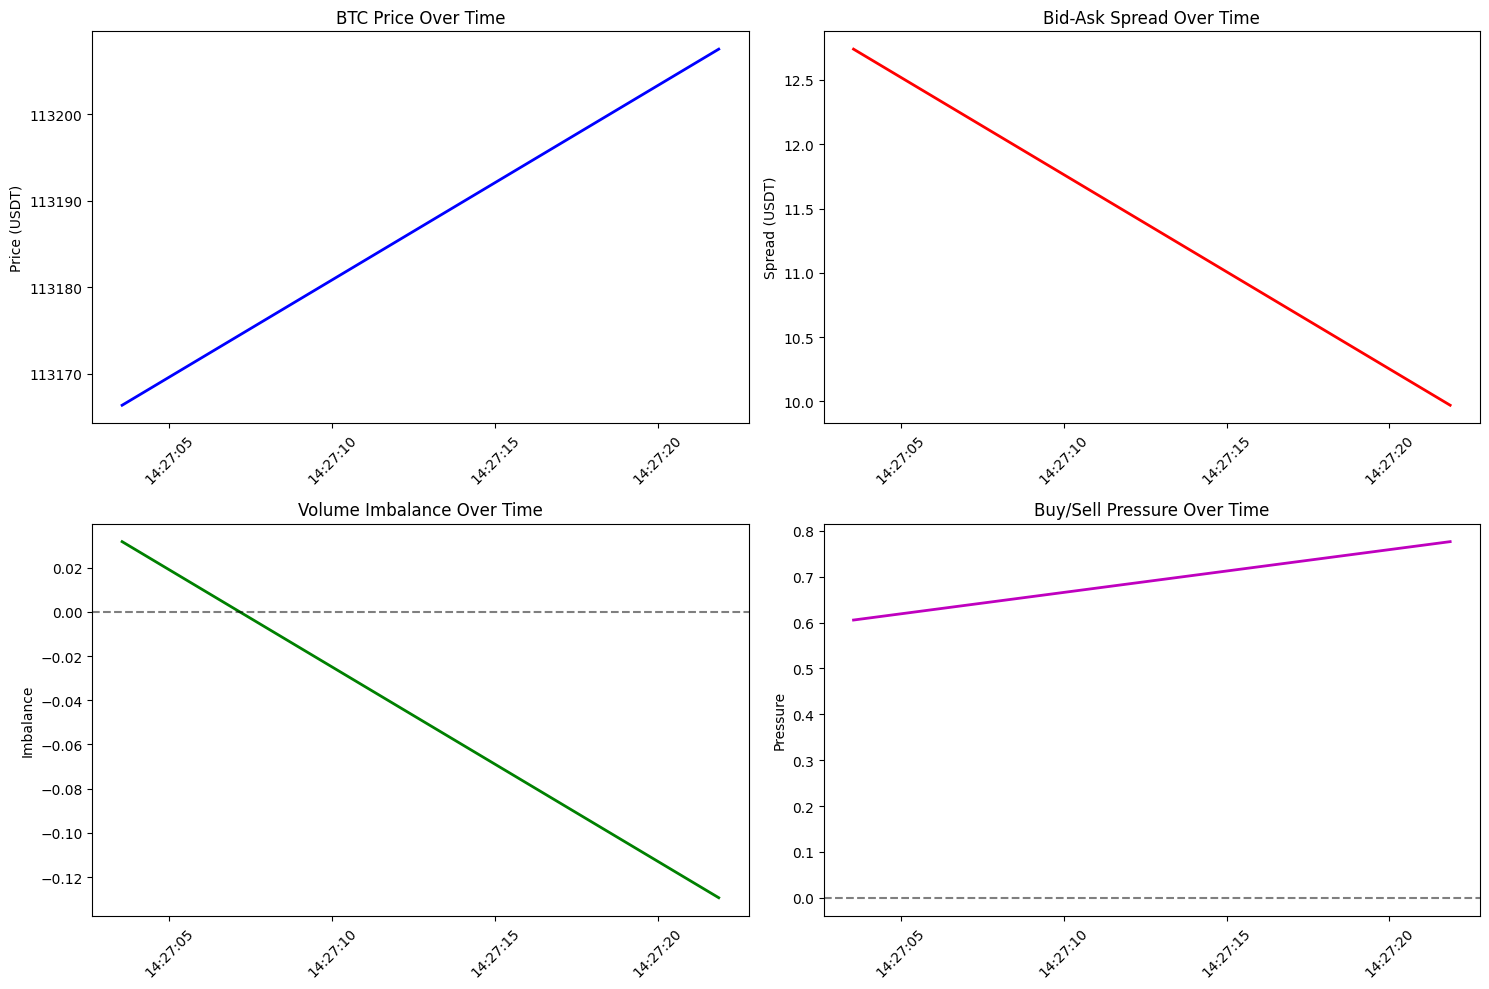

In [6]:
# Create visualizations if data is available
try:
    if 'ob_data' in locals() and len(ob_data) > 1:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Price over time
        axes[0,0].plot(ob_data['timestamp'], ob_data['mid_price'], 'b-', linewidth=2)
        axes[0,0].set_title('BTC Price Over Time')
        axes[0,0].set_ylabel('Price (USDT)')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Spread over time
        axes[0,1].plot(ob_data['timestamp'], ob_data['spread'], 'r-', linewidth=2)
        axes[0,1].set_title('Bid-Ask Spread Over Time')
        axes[0,1].set_ylabel('Spread (USDT)')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # Volume imbalance
        if 'features_data' in locals() and len(features_data) > 1:
            axes[1,0].plot(features_data['timestamp'], features_data['volume_imbalance'], 'g-', linewidth=2)
            axes[1,0].set_title('Volume Imbalance Over Time')
            axes[1,0].set_ylabel('Imbalance')
            axes[1,0].tick_params(axis='x', rotation=45)
            axes[1,0].axhline(y=0, color='k', linestyle='--', alpha=0.5)
        
        # Buy/sell pressure
        if 'features_data' in locals() and len(features_data) > 1:
            axes[1,1].plot(features_data['timestamp'], features_data['buy_sell_pressure'], 'm-', linewidth=2)
            axes[1,1].set_title('Buy/Sell Pressure Over Time')
            axes[1,1].set_ylabel('Pressure')
            axes[1,1].tick_params(axis='x', rotation=45)
            axes[1,1].axhline(y=0, color='k', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("⚠️  Not enough data for visualizations. Run the order book script to collect more data.")
        
except Exception as e:
    print(f"❌ Error creating visualizations: {e}")


In [7]:
# Summary of all data
print("📋 Data Summary:")
print("=" * 30)

files_to_check = [
    ('orderbook_data.csv', 'Order Book Data'),
    ('trades_data.csv', 'Trades Data'), 
    ('orderbook_features.csv', 'Features Data'),
    ('orderbook_signals.json', 'Signals Data')
]

for filename, description in files_to_check:
    try:
        if filename.endswith('.csv'):
            df = pd.read_csv(filename)
            print(f"✅ {description}: {len(df)} rows, {len(df.columns)} columns")
        elif filename.endswith('.json'):
            with open(filename, 'r') as f:
                data = json.load(f)
            print(f"✅ {description}: Available (latest signal: {data.get('direction', 'N/A')})")
    except FileNotFoundError:
        print(f"❌ {description}: File not found")
    except Exception as e:
        print(f"⚠️  {description}: Error - {e}")

print("\n💡 Tips:")
print("- Run 'python AlphaCrypto_OrderBook.py --continuous' to collect more data")
print("- More data points will improve feature analysis and correlations")
print("- Monitor the order book signals for prediction accuracy over time")


📋 Data Summary:
✅ Order Book Data: 2 rows, 10 columns
✅ Trades Data: 20 rows, 7 columns
✅ Features Data: 2 rows, 21 columns
✅ Signals Data: Available (latest signal: neutral)

💡 Tips:
- Run 'python AlphaCrypto_OrderBook.py --continuous' to collect more data
- More data points will improve feature analysis and correlations
- Monitor the order book signals for prediction accuracy over time
